----

### <span style="color:#0b486b">SIT744 Practical Machine Learning for Data Science</span>


----

# # <span style="color:#0b486b">Assignment One: Mastering Machine Learning Process</span>
### <span style="color:#0b486b">Due: 11:59 pm 18 August 2019 (Sunday)</span>

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **25%** to your final mark. Read the assignment instruction carefully.

This notebook has been prepared for you to complete Assignment 1. Some sections have been partially completed to help you get started. **The total marks for this notebook are 80 marks, which will be re-scaled to 25 marks in the grade.** 

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


## <span style="color:#0b486b">Instruction</span>

This assignment contains **three** parts, in increasing order of machine learning sophistication levels as we go through the process of building an effective machine learning solution.

* Part 1: Examine and understand your dataset **[10 points]**
* Part 2: Build Model Intuition: What Works and What doesn't **[57 points]**
* Part 3: Outlier/Anomaly Detection Survey: Write a Report to summarize at least 5 effective outlier/anomaly detection models and approaches published in recent 5 years **[13 points]**


**Hint**: this assignment was essentially designed based on the first three lectures and practical lab sessions. You are strongly recommended to go through these contents thoroughly which might help you complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to CloudDeakin. **By the due date, you are required to submit the following files to the corresponding Assignment in CloudDeakin**:

1.	<span style="color:red">**[YourID]\_assignment1\_solution.ipynb**</span>:  **this is your Python notebook solution source file**.
1.	<span style="color:red">**[YourID]\_assingment1\_output.html**</span>: **this is the output of your Python notebook solution *exported* in HTML format**.
1.	<span style="color:red">**[YourID]\_assingment1\_report.doc**</span>: **this is the report of your outlier detection survey work**.

For example, if your student ID is: 123456, you will then need to submit two files:
* 123456_assignment1_solution.ipynb
* 123456_assignment1_output.html
* 123456_assignment1_Report.doc

<span style="color:red">Now, please proceed to content below to complete your assignment!</span>

---

## <span style="color:#0b486b">Part 1: Examine and understand your dataset </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 10 points]**.<span></div>

This assignment shares a similar theme with the practical lab session in week 2. You are required to work with the NUS_WIDE data for the task of face recognition.

The first step in the process is to understand your data. You are given the following segments of codes
- to import necessary libraries, 
- to define a utility function to display face images from the dataset, and
- to load the dataset.

They are provided for you to get started. Please **do not** change the provided code as well the variables and function names as you will need them to complete subsequent tasks. 

---



**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the cell.

In [1]:
from sklearn import datasets

import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# append your own importing packages here if needed

In [2]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the Anaconda prompt.

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=60, resize=0.4)

In [4]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

---

You should realise that executing the above segment of codes will result in:
- variable `faces` containing the fetched dataset
- variables `X` and `y` which contain the features and the labels respectively.

We first examine the NUS_WIDE dataset. You are asked to supply your own codes in the following cells to answer the following questions.

####  <span style="color:red">**Question 1.1**</span>. Print out the description of the dataset using the variable `faces`. 
<div style="text-align: right"><span style="color:red">**[0.5 points]**</span></div>

In [5]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points in this dataset.
<div style="text-align: right"><span style="color:red">**[1.5 points]**</span></div> 

In [6]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Student can use different field such as data, images target_names to get the number of data points 
print(f'Total number of data points: {len(faces.data)}')

Total number of data points: 1348


####  <span style="color:red">**Question 1.3**</span>. Each class (or label) in this dataset corresponds to a public figure. Print out the number of classes, and the corresponding person name for each class. Print out 50 photos of *Ariel Sharon* and 50 photos of *Hugo Chavez*. You might decide to use the function `display_faces` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [7]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and the corresponding name of each class
class_ids=np.unique(y)

# [insert your code here]
print(f'Number of classes: {len(class_ids)}')

for i in range(len(class_ids)):
    # [insert your code here]
    print(faces.target_names[i])

Number of classes: 8
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Junichiro Koizumi
Tony Blair


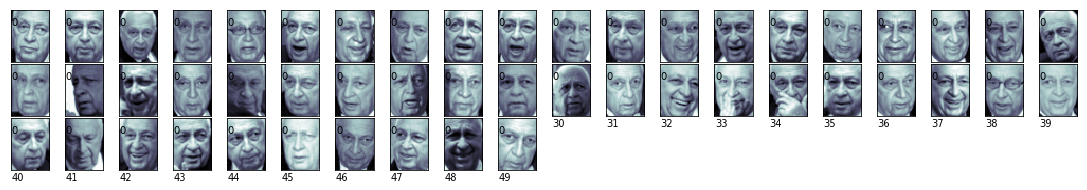

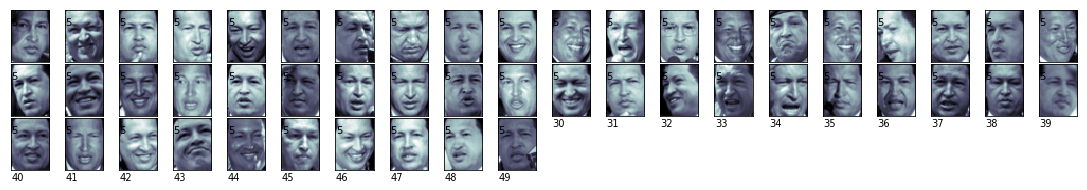

In [8]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out 50 photos of Ariel Sharon and 50 photos of Hugo Chavez

# Utility to print out 50 photos of a given person name
def display_faces_of_a_person(name):
    # Find id of the given person
    person_id = np.where(faces.target_names == name)[0][0]
    # Filter images of the found id
    images = [item[0] for item in zip(faces.images, faces.target) if item[1] == person_id]
    # Print out the first 50 photos from the filtered images
    display_faces(images[:50], [person_id]*50, 50)

# Print out photos of Ariel Sharon
display_faces_of_a_person('Ariel Sharon')

# Print out photos of Hugo Chavez
display_faces_of_a_person('Hugo Chavez')

####  <span style="color:red">**Question 1.4**</span>. Given our problem of interest is face recognition, should we choose supervised or unsupervised machine learning methods? Explain why and list at least four ML algorithms that are suitable for this problem.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

##### Use this markdown cell to write your answer to this question.

We should choose supervised machine learning methods since the dataset is labelled. Several ML algorithms that are suitable are as below:
- Logistic Regression
- Naive Bayes
- Support Vector Machines
- Linear Regression
- Nearest Neighbour

####  <span style="color:red">**Question 1.5**</span>. create *a single train-split* with 20% of data for testing and the rest for training.
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [9]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split

# split into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)# [insert your codes here]

---

### <span style="color:#0b486b">Part 2: Build Model  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 70 points]**.<span></div>

After we have gained a good understanding of the dataset from the previous step, we should by now be clear of the following points:

- Do you have labels for this data? And hence, is it a supervised learning or unsupervised learning problem?
- Recall that machine learning prediction is about learning a function $y= f(x)$, where $y$ is your label. Python variables `X` and `y` have been constructed and stored for you.
- Variable `X` is a matrix, with each row is a vector $x_i$ assigned with label $y_i$. You should examine the data types (continuous, categorical, its dimensionality, etc.) of the features in `X` and the label in $y$. This will help you choose the right ML methods.

These are the most common questions. Depending on the answers, more refined questions and considerations may be required for an improved solution.

As a machine learning practitioner, it is rarely the case that you can come up with the best solution at the first attempt. It is an iterative process. With the experience building up over time, you will be more efficient at it. **The next step is to get your hand dirty, start to explore to see what work, what doesn't work**. This process usually starts with models that are simple or more familiar to you.

####  <span style="color:red">**Question 2.1**</span>. Use a *single split-train approach* and *Logistic Regression* as the classifier, you will examine what works and what doesn't work for your data:

The total marks for this question are <span style="color:red">**[34 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write your code to use PCA for dimensionality reduction with 20 components to transform variable X to variable pca_X.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [10]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
pca = decomposition.PCA(n_components=20)
pca_X = pca.fit_transform(X)

#### <span style="color:red">**(b)**</span> **Use the reduced dimension features pca_X obtained in previous steps to write your code to show the performance (recall, precision, accuracy, F-score) using *Logistic Regression* as the classifier and a single train-split with 40% of data will be used for testing and the rest for training.**
<div style="text-align: right"> <span style="color:red">**[4 points]**</span> </div>

In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# [insert your codes here]
train_X, test_X, train_y, test_y = train_test_split(pca_X, y, test_size = 0.4)
# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
                              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
                              class_weight=None, random_state=None, solver='liblinear', \
                              max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
# train model
train_model = logistic.fit(train_X, train_y)
# perform prediction on the newly, unseen, test data.
pred_results = train_model.decision_function(test_X)
# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns a array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]
# print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(y)))]
print(metrics.classification_report(pred_labels, test_y, target_names=target_names))

              precision    recall  f1-score   support

    person 0       0.21      0.43      0.29        14
    person 1       0.68      0.61      0.64       109
    person 2       0.56      0.66      0.60        44
    person 3       0.83      0.70      0.76       254
    person 4       0.19      0.41      0.26        17
    person 5       0.42      0.50      0.46        22
    person 6       0.71      0.77      0.74        26
    person 7       0.47      0.50      0.48        54

    accuracy                           0.64       540
   macro avg       0.51      0.57      0.53       540
weighted avg       0.68      0.64      0.66       540



<span style="color:red">**(c)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) *using Repeated Random Train-Split* (10 runs, each with 60/40 split for training and testing) on the original data. You *must* report both the mean and standard deviation of the performance for each evaluation metrics**.
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# [insert your codes here]
# evaluate the model
cv = ShuffleSplit(n_splits=10, test_size=0.4, train_size=0.6) # split into training and testing sets with n_splits times.
for train_index, test_index in cv.split(pca_X):
    X_train, X_test, y_train, y_test = pca_X[train_index], pca_X[test_index], y[train_index], y[test_index]
    # train model
    train_model = logistic.fit(X_train, y_train)
    # perform prediction on the newly, unseen, test data.
    pred_results = train_model.decision_function(X_test)
    # LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
    # for multilabel classification problem returns a array of log-likelihood prediction for each label
    # Here, we need to use the argmax function to return the most likely predictive label.
    pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]
    # print out the classification report
    target_names=["person " + str(i) for i in range(len(np.unique(y)))]
    print(metrics.classification_report(pred_labels, y_test, target_names=target_names))

results = cross_val_score(train_model, pca_X, y, cv=cv) # run the model with n_splits datasets and evaluate output.
print(results) # print accuracy for n_splits times of data
print(results.mean())
print(results.std())

              precision    recall  f1-score   support

    person 0       0.23      0.54      0.32        13
    person 1       0.62      0.64      0.63        98
    person 2       0.60      0.61      0.61        44
    person 3       0.88      0.68      0.76       280
    person 4       0.16      0.33      0.21        18
    person 5       0.31      0.53      0.39        17
    person 6       0.68      0.68      0.68        22
    person 7       0.51      0.60      0.55        48

    accuracy                           0.64       540
   macro avg       0.50      0.58      0.52       540
weighted avg       0.71      0.64      0.66       540

              precision    recall  f1-score   support

    person 0       0.17      0.38      0.24        13
    person 1       0.68      0.58      0.63       105
    person 2       0.46      0.62      0.53        39
    person 3       0.85      0.65      0.73       265
    person 4       0.04      0.10      0.06        20
    person 5       0.34 

<span style="color:red">**(d)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds*.**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import KFold

# [insert your codes here]
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(pca_X):
    X_train, X_test, y_train, y_test = pca_X[train_index], pca_X[test_index], y[train_index], y[test_index]
    # train model
    train_model = logistic.fit(X_train, y_train)
    # perform prediction on the newly, unseen, test data.
    pred_results = train_model.decision_function(X_test)
    # LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
    # for multilabel classification problem returns a array of log-likelihood prediction for each label
    # Here, we need to use the argmax function to return the most likely predictive label.
    pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]
    # print out the classification report
    target_names=["person " + str(i) for i in range(len(np.unique(y)))]
    print(metrics.classification_report(pred_labels, y_test, target_names=target_names))

              precision    recall  f1-score   support

    person 0       0.27      1.00      0.43         3
    person 1       0.64      0.58      0.61        24
    person 2       0.67      0.53      0.59        15
    person 3       0.83      0.72      0.77        68
    person 4       0.00      0.00      0.00         3
    person 5       0.00      0.00      0.00         2
    person 6       0.83      0.56      0.67         9
    person 7       0.31      0.36      0.33        11

    accuracy                           0.61       135
   macro avg       0.44      0.47      0.43       135
weighted avg       0.69      0.61      0.64       135

              precision    recall  f1-score   support

    person 0       0.50      0.75      0.60         4
    person 1       0.70      0.70      0.70        23
    person 2       0.27      0.60      0.37         5
    person 3       0.82      0.57      0.67        70
    person 4       0.12      0.25      0.17         8
    person 5       0.12 

<span style="color:red">**(e)**</span> **Preparing a table to summarize the performances obtained from step (c) and (d) against recall, precision, accuracy and F-score from step (b). What conclusions can you draw from the comparison?**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

*Use this markdown cell to write your answer to this question.*

[*Enter our answer here*]
<table>
    <thead>
        <tr>
            <th scope="col">Evaluation Method</th>
            <th scope="col">Precision (Weighted Avg)</th>
            <th scope="col">Precision (Avg)</th>
            <th scope="col">Recall (Weighted Avg)</th>
            <th scope="col">Recall (Avg)</th>
            <th scope="col">F-score (Weighted Avg)</th>
            <th scope="col">F-score (Avg)</th>
            <th scope="col">Accuracy</th>
            <th scope="col">Accuracy (Mean)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th scope="row">Single Train-Split</th>
            <td>0.68</td>
            <td>0.68</td>
            <td>0.64</td>
            <td>0.64</td>
            <td>0.66</td>
            <td>0.66</td>
            <td>0.64</td>
            <td>0.64</td>
        </tr>
        <tr>
            <th scope="row">Repeated Random Train-Split</th>
            <td>[0.71, 0.67, 0.67, 0.68, 0.68, 0.70, 0.69, 0.67, 0.69, 0.70]</td>
            <td>0.69</td>
            <td>[0.64, 0.59, 0.61, 0.59, 0.62, 0.62, 0.60, 0.59, 0.61, 0.63]</td>
            <td>0.61</td>
            <td>[0.66, 0.62, 0.63, 0.62, 0.64, 0.64, 0.63, 0.62, 0.64, 0.65]</td>
            <td>0.64</td>
            <td>[0.64, 0.59, 0.61, 0.59, 0.62, 0.62, 0.62, 0.59, 0.61, 0.63]</td>
            <td>0.61</td>
        </tr>
        <tr>
            <th scope="row">K-Fold Cross-Validation</th>
            <td>[0.70, 0.66, 0.68, 0.65, 0.74, 0.61, 0.70, 0.70, 0.74, 0.73]</td>
            <td>0.69</td>
            <td>[0.63, 0.56, 0.62, 0.59, 0.65, 0.53, 0.61, 0.62, 0.69, 0.65]</td>
            <td>0.62</td>
            <td>[0.66, 0.59, 0.64, 0.60, 0.68, 0.55, 0.64, 0.65, 0.71, 0.68]</td>
            <td>0.64</td>
            <td>[0.63, 0.56, 0.62, 0.59, 0.65, 0.53, 0.61, 0.62, 0.69, 0.65]</td>
            <td>0.62</td>
        </tr>
    </tbody>
</table>

__Conclusions:__
* Most of the performances are slightly decreased when comparing the latter two methods to the single train-split.
* In this specific case, cross validation may prevent overfitting the machine learning model.

<span style="color:red">**Question 2.2.**</span> **Once you have built some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Linear SVM a good choice? Did the reduced dimension help improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**

The total marks for this question are <span style="color:red">**[23 points]**</span>, with the following detailed breakdown sub-questions:

**The following function is provided for you as an example of how one might 'package' the important steps so far into a single function to help accelerate your analyses**.

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

**Using  this function given above, you are asked to:**

<span style="color:red">**(a)**</span> **Write your code to call this function with the following specifications and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Linear SVM (using hinge loss)
    - PCA dimnesion = 20
    - the number of runs=10
    
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.svm import LinearSVC
svc = LinearSVC(loss='hinge')
results = ml_algorithm_screening_face(X, y, svc, 'svc', None, 20, 10)
print(results)
print(results.mean())
print(results.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[0.36296296 0.28888889 0.32592593 0.42962963 0.3037037  0.31851852
 0.3037037  0.39259259 0.44029851 0.36567164]
0.3531896075179657
0.051198278129498766


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


<span style="color:red">**(b)**</span>**Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimension.**

**Write your code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.2(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the medium and the interquartile range of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

<div style="text-align: right"> <span style="color:red">**[15 points]**<span> </div>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10

Dimension = 10
[0.32592593 0.27407407 0.21481481 0.22222222 0.17777778 0.25185185
 0.25925926 0.35555556 0.31343284 0.32089552]
Dimension = 20
[0.37777778 0.3037037  0.41481481 0.37777778 0.34074074 0.42962963
 0.3037037  0.37037037 0.32089552 0.30597015]
Dimension = 30
[0.46666667 0.37777778 0.42962963 0.39259259 0.46666667 0.37777778
 0.5037037  0.37037037 0.49253731 0.3880597 ]
Dimension = 40
[0.46666667 0.45185185 0.45925926 0.46666667 0.56296296 0.43703704
 0.48148148 0.51851852 0.52985075 0.41044776]
Dimension = 50
[0.4962963  0.5037037  0.48888889 0.45185185 0.59259259 0.5037037
 0.44444444 0.51851852 0.52238806 0.44776119]
Dimension = 60
[0.54074074 0.42962963 0.58518519 0.51851852 0.62222222 0.57037037
 0.57037037 0.53333333 0.67164179 0.47761194]
Dimension = 70
[0.5037037  0.43703704 0.46666667 0.53333333 0.64444444 0.62222222
 0.51111111 0.52592593 0.52238806 0.50746269]
Dimension = 80
[0.62962963 0.51111111 0.51851852 0.51851852 0.65185185 0.54814815
 0.61481481 0.64444444 

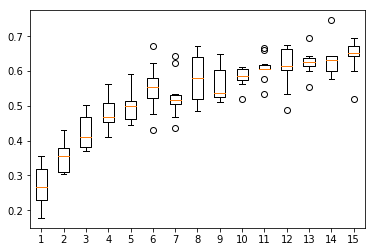

Dimension giving the best result is 150 with 0.6424709784411277 accuracy


In [16]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# [insert your code here]
results = {}
for dim in range(10,151,10):
    result = ml_algorithm_screening_face(X, y, svc, 'svc', None, dim, 10)
    results[dim] = result

best_dim = 0
best_mean_accuracy = 0
for dim, result in results.items():
    print(f'Dimension = {dim}')
    print(result)
    mean_accuracy = result.mean()
    if (mean_accuracy > best_mean_accuracy):
        best_dim = dim
        best_mean_accuracy = mean_accuracy

fig, ax = plt.subplots()
ax.boxplot(results.values())
plt.show()

print(f'Dimension giving the best result is {best_dim} with {best_mean_accuracy} accuracy')

### <span style="color:#0b486b">Part 3: Outlier Detection Survey  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 13 points]**.<span></div>

You are required to read at least 5 papers relating to outlier detection in the recent 5 years. It will help gain a good understanding how/when to use outlier detection models, how these models work in different datasets. The report needs to include the below points:
- Explain why you choose the five models with at least 0.5 A4 Page at the begining of the report; <span style="color:red">**[3 points]**.</span>
- For each model, you need to do <span style="color:red">**[2 points per model]**.</span>
    - at least 5 outlier detection models with the reference information where the model is published;
    - write 0.5 A4 Page for each model;
    - summarize the full strengths and weakness of each model by clearly presenting the evidence from the experiments declared in their original papers; 
    - Evaluation metrics and available datasets used for each model.

One example report looks like "On the Evaluation of Unsupervised Outlier Detection: Measures, Datasets, and an Empirical Study
by G. O. Campos, A. Zimek, J. Sander, R. J. G. B. Campello, B. Micenková, E. Schubert, I. Assent and M. E. Houle
Data Mining and Knowledge Discovery 30(4): 891-927, 2016, DOI: 10.1007/s10618-015-0444-8". https://link.springer.com/article/10.1007%2Fs10618-015-0444-8.

---
<div style="text-align: center">**END OF ASSIGNMENT ONE**</div>